In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_excel('/content/poultrydata.xlsx')

In [19]:
data.head()


,FEED IN,FEED TYPE,DAILY,CUM,STOCK,COST,AGE,BIRD COUNT,B.WEIGHT,MORT,FEED MIN INTAKE,FEED ACTUAL INTAKE,FCR
0,10,STARTER,1,1,9,1500,1,4589,56,1,13,13,0.23
1,0,STARTER,1,2,8,1500,2,4583,70,6,29,26,0.41
2,0,STARTER,1,3,7,1500,3,4573,89,10,49,39,0.55
3,0,STARTER,2,5,5,1500,4,4570,110,3,73,65,0.66
4,4,STARTER,1,6,4,1500,5,4568,132,2,101,78,0.76


In [20]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1hhtDaTQWUtOLi9-jN2y0zVuY8_lZP0Ssh-dz7Hxr4mw#gid=0


In [21]:
# to find which perid has high mortality
import altair as alt

# Calculate mortality rate
data['Mortality Rate'] = data['MORT'] / data['BIRD COUNT']

# Create the line chart
chart = alt.Chart(data).mark_line().encode(
    x='AGE',
    y='Mortality Rate'
).properties(title='Mortality Rate Over Age')

chart

alt.Chart(...)

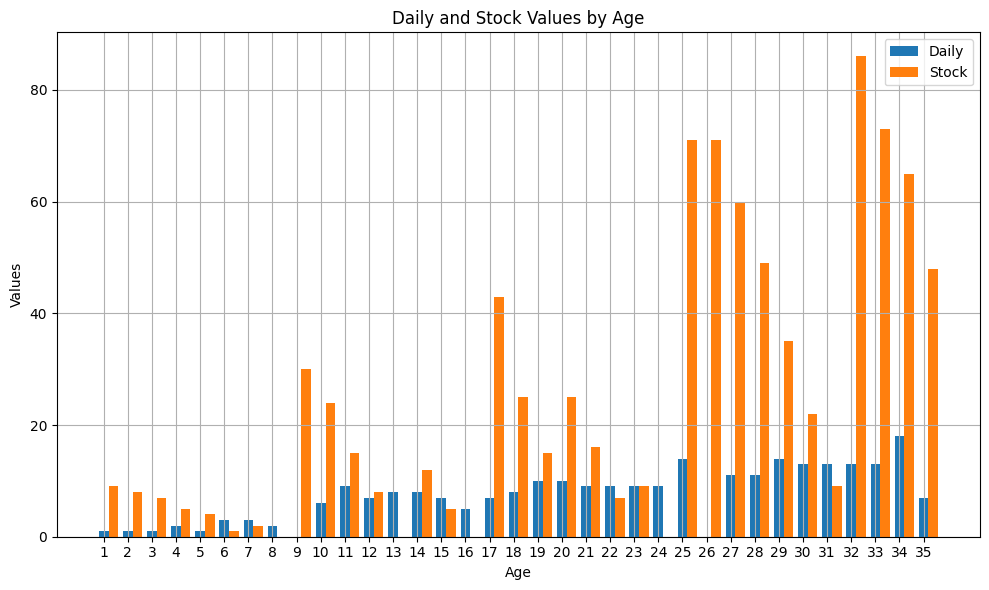

In [22]:
# prompt: multiple bar chart   x= age , y=daily,stock

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# with columns 'AGE', 'Daily', and 'Stock'

# Create the multiple bar chart
plt.figure(figsize=(10, 6))

# Assuming 'Daily' and 'Stock' are numerical and represent different categories
plt.bar(data['AGE'], data['DAILY'], label='Daily', width=0.4)
plt.bar(data['AGE'] + 0.4, data['STOCK'], label='Stock', width=0.4)  # Offset for visualization

plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Daily and Stock Values by Age')
plt.xticks(data['AGE'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# prompt: line chart for FCR ( FEED CONVERTION RATIO)

import altair as alt

# Assuming your data is in a DataFrame called 'data'
# and has columns 'AGE' and 'FCR' (Feed Conversion Ratio)

# Create the line chart
chart = alt.Chart(data).mark_line().encode(
    x='AGE',
    y='FCR'
).properties(title='Feed Conversion Ratio Over Age')

chart

alt.Chart(...)

In [24]:
# prompt: # prompt: use multiple linear regression model use BIRD COUNT , FCR ,AGE to predict the sum of DAILY that are required at definite stage thus we can buy and store in warehouse

# ... (your existing imports and data loading)

# Prepare the data for multiple linear regression
X = data[['BIRD COUNT', 'FCR', 'AGE']]  # Features
y = data['DAILY']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict daily feed for a given age range and other parameters
def predict_daily_feed(start_age, end_age, bird_count, fcr, step=1):
    predictions = {}
    for age in np.arange(start_age, end_age + step, step):
        user_input = np.array([[bird_count, fcr, age]])
        predicted_daily = model.predict(user_input)
        predictions[age] = predicted_daily[0]
    return predictions

# Get user input
while True:
    try:
        start_age = float(input("Enter the starting age: "))
        end_age = float(input("Enter the ending age: "))
        bird_count = float(input("Enter the bird count: "))
        fcr = float(input("Enter the feed conversion ratio (FCR): "))
        if start_age >= 0 and end_age >= start_age and bird_count > 0 and fcr > 0:
            break
        else:
            print("Invalid input. Please check your values.")
    except ValueError:
        print("Invalid input. Please enter numbers.")

# Predict daily feed for the specified range
predicted_daily_feed = predict_daily_feed(start_age, end_age, bird_count, fcr)

# Print or process predictions
for age, daily_feed in predicted_daily_feed.items():
    print(f"Predicted daily feed for age {age:.2f}: {daily_feed:.2f}")

# Calculate the total daily feed needed for the entire range
total_daily_feed = sum(predicted_daily_feed.values())
print(f"\nTotal daily feed needed for the age range {start_age} to {end_age}: {total_daily_feed:.2f}")

Enter the starting age: 36
Enter the ending age: 37
Enter the bird count: 2500
Enter the feed conversion ratio (FCR): 1.65
Predicted daily feed for age 36.00: 12.10
Predicted daily feed for age 37.00: 12.42

Total daily feed needed for the age range 36.0 to 37.0: 24.52


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# prompt: calculate the cost that is reqired for the total_daily_deed

# Assuming 'feed_cost_per_unit' is the cost of feed per unit of daily feed.
# You need to define this value based on your data or input.

feed_cost_per_unit = float(input("Enter the feed cost per unit: "))  # Get feed cost from the user


# Calculate the total cost
total_cost = total_daily_feed * feed_cost_per_unit
print(f"\nTotal cost for the age range {start_age} to {end_age}: {total_cost:.2f}")

Enter the feed cost per unit: 2000

Total cost for the age range 36.0 to 37.0: 49042.04


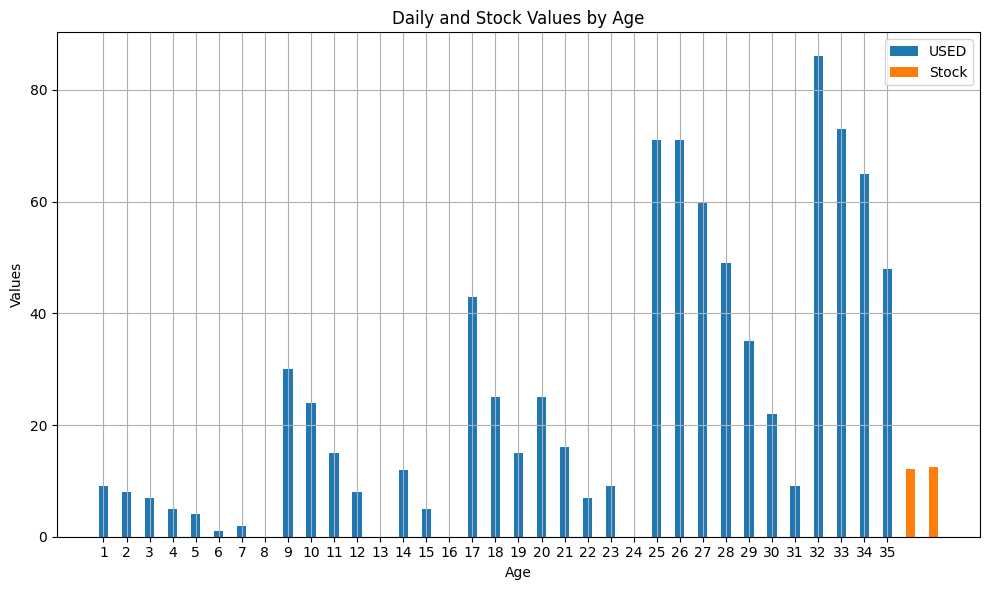

In [25]:
# prompt: multiple bar chart   x= age , y=daily,stock

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# with columns 'AGE', 'Daily', and 'Stock'

ages = list(predicted_daily_feed.keys())
predicted_stocks = list(predicted_daily_feed.values())

# Create the multiple bar chart
plt.figure(figsize=(10, 6))

# Assuming 'Daily' and 'Stock' are numerical and represent different categories
plt.bar(data['AGE'], data['STOCK'], label='USED', width=0.4)
plt.bar(ages, predicted_stocks, label='Stock', width=0.4)  # Offset for visualization

plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Daily and Stock Values by Age')
plt.xticks(data['AGE'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

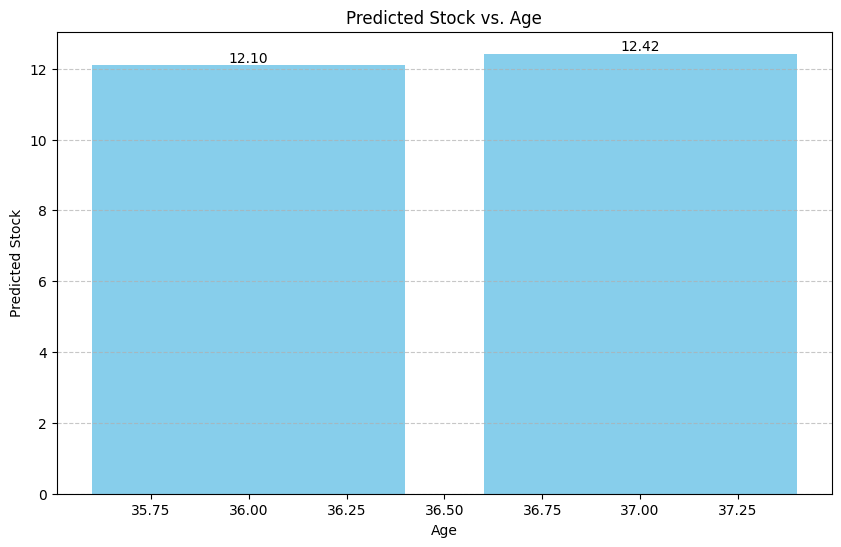

In [26]:
# prompt: bar chart age and stock

import matplotlib.pyplot as plt

# Assuming predicted_stock_range is the dictionary from the previous code
# Example: predicted_stock_range = {1: 100, 2: 150, 3: 200, 4: 220}

ages = list(predicted_daily_feed.keys())
predicted_stocks = list(predicted_daily_feed.values())

plt.figure(figsize=(10, 6))
plt.bar(ages, predicted_stocks, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Predicted Stock")
plt.title("Predicted Stock vs. Age") #Improved title
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for i, stock in enumerate(predicted_stocks):
    plt.text(ages[i], stock, f'{stock:.2f}', ha='center', va='bottom')

plt.show()